In [1]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [2]:
train=pd.read_csv(r"/Users/htamvada/plant-pathology-2020/train.csv")
test=pd.read_csv(r"/Users/htamvada/plant-pathology-2020/test.csv")

In [3]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [4]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


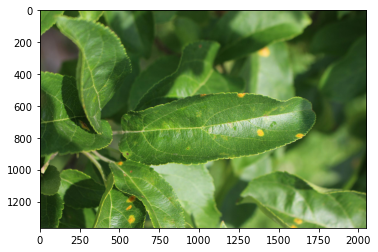

In [5]:
image1=Image.open(r'/Users/htamvada/plant-pathology-2020/images/test/Test_0.jpg')
plt.imshow(image1)
plt.show()

In [6]:
class_names=train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [7]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1

In [8]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [9]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [10]:
cwd=os.getcwd()+'/images'
print(cwd)
os.listdir(cwd)

/Users/htamvada/plant-pathology-2020/images


['Test_588.jpg',
 'Train_1088.jpg',
 'Train_364.jpg',
 'Test_1270.jpg',
 'Train_1705.jpg',
 'Train_1063.jpg',
 'Test_1516.jpg',
 'Train_402.jpg',
 'Train_416.jpg',
 'Train_1077.jpg',
 'Test_1502.jpg',
 'Test_1264.jpg',
 'Test_239.jpg',
 'Train_1711.jpg',
 'Train_370.jpg',
 'Train_1739.jpg',
 'Test_211.jpg',
 'Train_358.jpg',
 'Test_577.jpg',
 'Test_563.jpg',
 'Test_1258.jpg',
 'Test_205.jpg',
 'Test_952.jpg',
 'Test_946.jpg',
 'Train_827.jpg',
 'Train_199.jpg',
 'Test_1099.jpg',
 'Train_833.jpg',
 'Train_600.jpg',
 'Test_1714.jpg',
 'Test_991.jpg',
 'Train_1261.jpg',
 'Test_749.jpg',
 'Train_1507.jpg',
 'Test_1072.jpg',
 'Train_166.jpg',
 'Train_172.jpg',
 'Train_1513.jpg',
 'Test_1066.jpg',
 'Test_1700.jpg',
 'Test_985.jpg',
 'Train_1275.jpg',
 'Train_614.jpg',
 'Test_1728.jpg',
 'Test_775.jpg',
 'Train_628.jpg',
 'Test_761.jpg',
 'Train_1249.jpg',
 'Test_826.jpg',
 'Test_198.jpg',
 'Test_14.jpg',
 'Test_832.jpg',
 'Train_953.jpg',
 'Train_1498.jpg',
 'Test_28.jpg',
 'Train_947.jpg',


In [11]:
def create_train_test_data():
    images=natsort.natsorted(os.listdir(cwd))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(cwd,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.move(path,r'/Users/htamvada/plant-pathology-2020/images/train/healthy')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.move(path,r'/Users/htamvada/plant-pathology-2020/images/train/multiple_disease')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.move(path,r'/Users/htamvada/plant-pathology-2020/images/train/rust')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.move(path,r'/Users/htamvada/plant-pathology-2020/images/train/scab')
                
        elif search("Test",img):
            shutil.move(path,r'/Users/htamvada/plant-pathology-2020/images/test')

In [12]:
if not os.path.exists(r'/Users/htamvada/plant-pathology-2020/images/train'):
    shutil.os.mkdir(r'/Users/htamvada/plant-pathology-2020/images/train')
    shutil.os.mkdir(r'/Users/htamvada/plant-pathology-2020/images/train/healthy')
    shutil.os.mkdir(r'/Users/htamvada/plant-pathology-2020/images/train/multiple_disease')
    shutil.os.mkdir(r'/Users/htamvada/plant-pathology-2020/images/train/rust')
    shutil.os.mkdir(r'/Users/htamvada/plant-pathology-2020/images/train/scab')
    shutil.os.mkdir(r'/Users/htamvada/plant-pathology-2020/images/test')

In [13]:
train_test_dir=create_train_test_data()

  0%|          | 1/3645 [00:00<00:05, 672.92it/s]


Error: Destination path '/Users/htamvada/plant-pathology-2020/images/test/Test_0.jpg' already exists

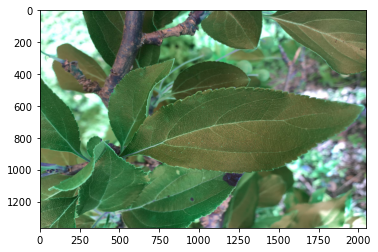

In [14]:
Train_DIR=r'/Users/htamvada/plant-pathology-2020/images/train'
Categories=['healthy','multiple_disease','rust','scab']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break

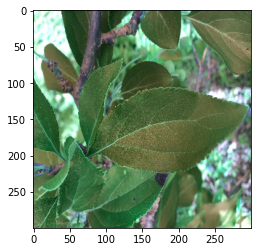

In [15]:
IMG_SIZE=300
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D

In [17]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'/Users/htamvada/plant-pathology-2020/images/train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'/Users/htamvada/plant-pathology-2020/images/train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [18]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 64)       0

In [19]:
checkpoint=ModelCheckpoint(r'/Users/htamvada/plant-pathology-2020/models/apple2.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [20]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=30,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                 callbacks=callbacks)

<ipython-input-20-f3d4518fa28e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(train_datagen,validation_data=val_datagen,


Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 1.2639 - accuracy: 0.3377
Epoch 1: val_loss improved from inf to 1.29112, saving model to /Users/htamvada/plant-pathology-2020/models/apple2.h5
91/91 [==============================] - 205s 2s/step - loss: 1.2639 - accuracy: 0.3377 - val_loss: 1.2911 - val_accuracy: 0.2812
Epoch 2/30
91/91 [==============================] - ETA: 0s - loss: 1.2366 - accuracy: 0.3350
Epoch 2: val_loss improved from 1.29112 to 1.22364, saving model to /Users/htamvada/plant-pathology-2020/models/apple2.h5
91/91 [==============================] - 208s 2s/step - loss: 1.2366 - accuracy: 0.3350 - val_loss: 1.2236 - val_accuracy: 0.3693
Epoch 3/30
91/91 [==============================] - ETA: 0s - loss: 1.2378 - accuracy: 0.3655
Epoch 3: val_loss did not improve from 1.22364
91/91 [==============================] - 202s 2s/step - loss: 1.2378 - accuracy: 0.3655 - val_loss: 1.2420 - val_accuracy: 0.3352
Epoch 4/30
91/91 [=======================

91/91 [==============================] - 201s 2s/step - loss: 0.2454 - accuracy: 0.9105 - val_loss: 0.2653 - val_accuracy: 0.9119
Epoch 28/30
91/91 [==============================] - ETA: 0s - loss: 0.2139 - accuracy: 0.9223
Epoch 28: val_loss improved from 0.26531 to 0.26203, saving model to /Users/htamvada/plant-pathology-2020/models/apple2.h5
91/91 [==============================] - 237s 3s/step - loss: 0.2139 - accuracy: 0.9223 - val_loss: 0.2620 - val_accuracy: 0.9034
Epoch 29/30
91/91 [==============================] - ETA: 0s - loss: 0.2152 - accuracy: 0.9313
Epoch 29: val_loss improved from 0.26203 to 0.26177, saving model to /Users/htamvada/plant-pathology-2020/models/apple2.h5
91/91 [==============================] - 224s 2s/step - loss: 0.2152 - accuracy: 0.9313 - val_loss: 0.2618 - val_accuracy: 0.9006
Epoch 30/30
91/91 [==============================] - ETA: 0s - loss: 0.2083 - accuracy: 0.9341
Epoch 30: val_loss did not improve from 0.26177
91/91 [========================

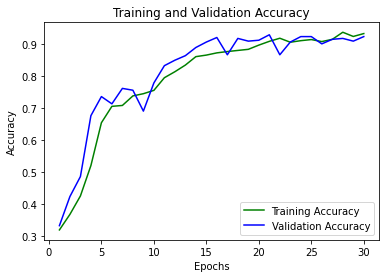

In [19]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,31)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

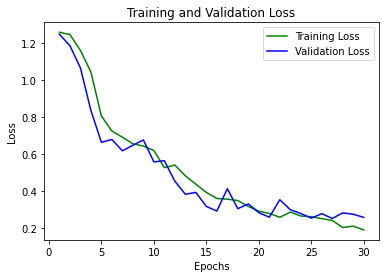

In [20]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

3


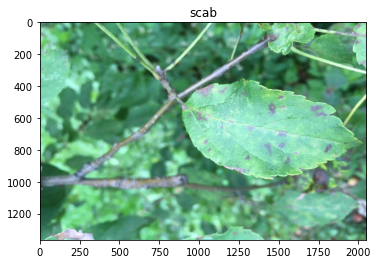

In [26]:
test_image=r'/Users/htamvada/plant-pathology-2020/images/Test_186.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()